In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw

c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

In [4]:
local_path = si.download_dataset(remote_path="mearec/mearec_test_10s.h5")

 modified: mearec\mearec_test_10s.h5 (file)
1 annex'd file (59.4 MB recorded total size)


In [5]:
recording, sorting_true = se.read_mearec(local_path)
print(recording)
print(sorting_true)

MEArecRecordingExtractor: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                          float32 dtype - 39.06 MiB
  file_path: C:\Users\tanaka-users\spikeinterface_datasets\ephy_testing_data\mearec\mearec_test_10s.h5
MEArecSortingExtractor: 10 units - 1 segments - 32.0kHz
  file_path: C:\Users\tanaka-users\spikeinterface_datasets\ephy_testing_data\mearec\mearec_test_10s.h5


In [6]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

Channel ids: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32']
Sampling frequency: 32000.0
Number of channels: 32
Number of segments: 1


In [7]:
num_seg = recording.get_num_segments()
unit_ids = sorting_true.get_unit_ids()
spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

print("Number of segments:", num_seg)
print("Unit ids:", unit_ids)
print("Spike train of first unit:", spike_train)

Number of segments: 1
Unit ids: ['#0' '#1' '#2' '#3' '#4' '#5' '#6' '#7' '#8' '#9']
Spike train of first unit: [  5197   8413  13124  15420  15497  15668  16929  19607  55107  59060
  60958 105193 105569 117082 119243 119326 122293 122877 132413 139498
 147402 147682 148271 149857 165454 170569 174319 176237 183598 192278
 201535 217193 219715 221226 222967 223897 225338 243206 243775 248754
 253184 253308 265132 266197 266662 283149 284716 287592 304025 305286
 310438 310775 318460]


Probe - 32ch - 1shanks


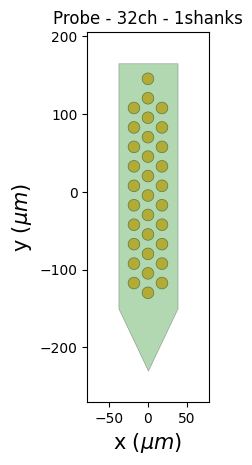

In [8]:
probe = recording.get_probe()
print(probe)

from probeinterface.plotting import plot_probe

_ = plot_probe(probe)

In [9]:
recording_cmr = recording
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
print(recording_f)
recording_cmr = spre.common_reference(recording_f, reference="global", operator="median")
print(recording_cmr)

# this computes and saves the recording after applying the preprocessing chain
recording_preprocessed = recording_cmr.save(format="binary")
print(recording_preprocessed)

BandpassFilterRecording: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                         float32 dtype - 39.06 MiB
CommonReferenceRecording: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                          float32 dtype - 39.06 MiB
Use cache_folder=C:\Users\TANAKA~1\AppData\Local\Temp\spikeinterface_cache\tmpsh48e3_9\B1H9G2NM
write_binary_recording 
engine=process - n_jobs=4 - samples_per_chunk=32,000 - chunk_memory=3.91 MiB - total_memory=15.62 MiB - chunk_duration=1.00s


write_binary_recording (workers: 4 processes): 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]


BinaryFolderRecording: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                       float32 dtype - 39.06 MiB


In [10]:
print("Available sorters", ss.available_sorters())
print("Installed sorters", ss.installed_sorters())

Available sorters ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'kilosort4', 'mountainsort4', 'mountainsort5', 'pykilosort', 'rtsort', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']
Installed sorters ['simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2']


In [11]:
print("Tridesclous params:")
pprint(ss.get_default_sorter_params("tridesclous"))
print("SpykingCircus2 params:")
pprint(ss.get_default_sorter_params("spykingcircus2"))
print("simple params:")
pprint(ss.get_default_sorter_params("simple"))

Tridesclous params:
{'chunk_duration': '1s',
 'common_ref_removal': False,
 'detect_sign': -1,
 'detect_threshold': 5,
 'freq_max': 5000.0,
 'freq_min': 400.0,
 'max_threads_per_worker': 1,
 'mp_context': None,
 'n_jobs': 4,
 'nested_params': None,
 'pool_engine': 'process',
 'progress_bar': True}
SpykingCircus2 params:
{'apply_motion_correction': True,
 'apply_preprocessing': True,
 'cache_preprocessing': {'delete_cache': True,
                         'memory_limit': 0.5,
                         'mode': 'memory'},
 'chunk_preprocessing': {'memory_limit': None},
 'clustering': {'method': 'circus-clustering',
                'method_kwargs': {'remove_small_snr': True}},
 'debug': False,
 'detection': {'method': 'matched_filtering',
               'method_kwargs': {'detect_threshold': 5, 'peak_sign': 'neg'}},
 'deterministic_peaks_detection': False,
 'filtering': {'filter_order': 2,
               'freq_max': 7000,
               'freq_min': 150,
               'ftype': 'bessel',
     

In [12]:
sorting_SMPL = ss.run_sorter(sorter_name="simple", remove_existing_folder=True, recording=recording_preprocessed)
print(sorting_SMPL)


noise_level (workers: 4 processes): 100%|██████████| 20/20 [00:00<00:00, 27.96it/s]
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


NumpyFolder (NumpyFolderSorting): 10 units - 1 segments - 32.0kHz


In [13]:
sorting_SC2 = ss.run_sorter(sorter_name="spykingcircus2", remove_existing_folder=True, recording=recording_preprocessed)
print(sorting_SC2)

spykingcircus2 could benefit from using torch. Consider installing it


c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\core\sortinganalyzer.py:487: UserWarning: The Recording is not serializable! The recording link will be lost for future load
  warnings.warn("The Recording is not serializable! The recording link will be lost for future load")
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\core\sortinganalyzer.py:487: UserWarning: The Recording is not serializable! The recording link will be lost for future load
  warnings.warn("The Recording is not serializable! The recording link will be lost for future load")


NumpyFolder (NumpyFolderSorting): 16 units - 1 segments - 32.0kHz


In [14]:
print("Units found by simple:", sorting_SMPL.get_unit_ids())
print("Units found by spyking-circus2:", sorting_SC2.get_unit_ids())

Units found by simple: [0 1 2 3 4 5 6 7 8 9]
Units found by spyking-circus2: [ 1  5  6  7  8 10 11 13 14 17 20 21 22 24 31 33]


In [16]:
analyzer_SMPL = si.create_sorting_analyzer(sorting=sorting_SMPL, recording=recording_preprocessed, format='binary_folder', folder='analyzer_SMPL_binary', overwrite=True)

estimate_sparsity (workers: 4 processes): 100%|██████████| 10/10 [00:00<00:00, 20.83it/s]
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\core\basesorting.py:380: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


In [17]:
# analyzer_SMPL.compute("random_spikes")
# analyzer_SMPL.compute("waveforms")
# analyzer_SMPL.compute("noise_levels")
# analyzer_SMPL.compute("templates")
# analyzer_SMPL.compute("spike_amplitudes")
extensions_to_compute = [
    "random_spikes",
    "waveforms",
    "noise_levels",
    "templates",
    "spike_amplitudes",
    "unit_locations",
    "spike_locations",
    "correlograms",
    "template_similarity"
]

extension_params = {
    "unit_locations": {"method": "center_of_mass"},
    "spike_locations": {"ms_before": 0.1},
    "correlograms": {"bin_ms": 0.1},
    "template_similarity": {"method": "cosine_similarity"}
}

analyzer_SMPL.compute(extensions_to_compute, extension_params=extension_params)

noise_level (workers: 4 processes): 100%|██████████| 20/20 [00:00<00:00, 24.82it/s]
Compute : spike_amplitudes + spike_locations (workers: 4 processes): 100%|██████████| 10/10 [00:00<00:00, 351.19it/s]


In [18]:
unit_id0 = analyzer_SMPL.unit_ids[0]
waveforms = analyzer_SMPL.get_extension("waveforms").get_data()[unit_id0]
print(waveforms.shape)

(96, 25)


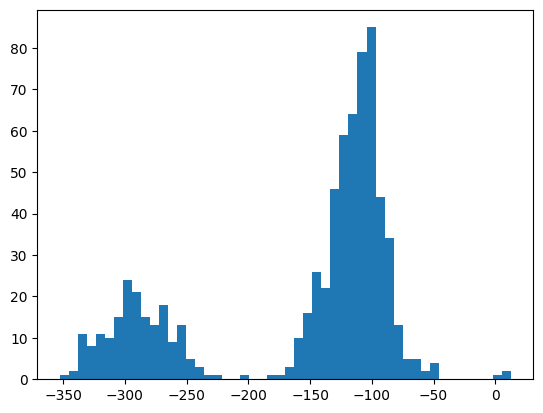

In [19]:
amplitudes = analyzer_SMPL.get_extension("spike_amplitudes").get_data()
plt.hist(amplitudes, bins=50)
plt.show()

In [20]:
print(analyzer_SMPL.get_saved_extension_names())
print(analyzer_SMPL.get_loaded_extension_names())

['correlograms', 'noise_levels', 'random_spikes', 'spike_amplitudes', 'spike_locations', 'templates', 'template_similarity', 'unit_locations', 'waveforms']
['random_spikes', 'waveforms', 'noise_levels', 'templates', 'unit_locations', 'correlograms', 'template_similarity', 'spike_amplitudes', 'spike_locations']


In [27]:
analyzer_SMPL.delete_extension("spike_amplitudes")

In [30]:
sorting_analyzer_path = './analyzer_SMPL_binary'
analyzer_loaded = si.load_sorting_analyzer(sorting_analyzer_path)
print(analyzer_loaded.get_loaded_extension_names())

['correlograms', 'noise_levels', 'random_spikes', 'spike_amplitudes', 'spike_locations', 'templates', 'template_similarity', 'unit_locations', 'waveforms']


In [29]:
analyzer_SMPL.compute("spike_amplitudes")

spike_amplitudes (workers: 4 processes): 100%|██████████| 10/10 [00:01<00:00,  7.59it/s]


In [31]:
qm_params = sqm.get_default_qm_params()
pprint(qm_params)

{'amplitude_cutoff': {'amplitudes_bins_min_ratio': 5,
                      'histogram_smoothing_value': 3,
                      'num_histogram_bins': 100,
                      'peak_sign': 'neg'},
 'amplitude_cv': {'amplitude_extension': 'spike_amplitudes',
                  'average_num_spikes_per_bin': 50,
                  'min_num_bins': 10,
                  'percentiles': (5, 95)},
 'amplitude_median': {'peak_sign': 'neg'},
 'd_prime': {},
 'drift': {'direction': 'y',
           'interval_s': 60,
           'min_num_bins': 2,
           'min_spikes_per_interval': 100},
 'firing_range': {'bin_size_s': 5, 'percentiles': (5, 95)},
 'firing_rate': {},
 'isi_violation': {'isi_threshold_ms': 1.5, 'min_isi_ms': 0},
 'isolation_distance': {},
 'l_ratio': {},
 'nearest_neighbor': {'max_spikes': 10000, 'n_neighbors': 5},
 'nn_isolation': {'max_spikes': 10000,
                  'min_fr': 0.0,
                  'min_spikes': 10,
                  'n_components': 10,
                  'n_n

In [32]:
qm_params["presence_ratio"]["bin_duration_s"] = 1
qm_params["amplitude_cutoff"]["num_histogram_bins"] = 5
qm_params["drift"]["interval_s"] = 2
qm_params["drift"]["min_spikes_per_interval"] = 2

In [33]:
analyzer_SMPL.compute("quality_metrics", qm_params)
analyzer_SMPL.get_extension("quality_metrics").get_data()

c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\qualitymetrics\misc_metrics.py:318: UserWarning: Bin duration of 60s is larger than recording duration. Presence ratios are set to NaN.
  warnings.warn(
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\qualitymetrics\misc_metrics.py:1066: UserWarning: Some units have too few spikes : amplitude_cutoff is set to NaN
  warnings.warn(f"Some units have too few spikes : amplitude_cutoff is set to NaN")
c:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\.venv\Lib\site-packages\spikeinterface\qualitymetrics\misc_metrics.py:1222: UserWarning: The recording is too short given the specified 'interval_s' and 'min_num_bins'. Drift metrics will be set to NaN
  warnings.warn(
noise_level (workers: 4 processes): 100%|██████████| 20/20 [00:00<00:00, 37.09it/s]


,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,...,sync_spike_2,sync_spike_4,sync_spike_8,firing_range,drift_ptp,drift_std,drift_mad,sd_ratio,noise_cutoff,noise_ratio
0,51,5.1,NaN,24.795137,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.54,NaN,NaN,NaN,1.939960,-0.698444,0.046296
1,31,3.1,NaN,27.292151,3.468609,1.0,1.000000,1.0,NaN,NaN,...,0.0,0.0,0.0,0.54,NaN,NaN,NaN,1.525229,-0.243517,0.052632
2,51,5.1,NaN,24.478804,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.18,NaN,NaN,NaN,1.269182,-0.196601,0.072464
3,34,3.4,NaN,9.717578,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.72,NaN,NaN,NaN,0.789016,0.101822,0.058824
4,42,4.2,NaN,7.850867,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.00,NaN,NaN,NaN,1.538546,0.506491,0.277778
5,38,3.8,NaN,13.562520,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.72,NaN,NaN,NaN,0.821344,-0.265223,0.047619
6,49,4.9,NaN,27.442171,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.90,NaN,NaN,NaN,1.691959,-0.494492,0.026042
7,122,12.2,NaN,11.455663,0.000000,0.0,0.000000,0.0,NaN,NaN,...,0.0,0.0,0.0,0.72,NaN,NaN,NaN,0.781060,-0.407383,0.068966
8,102,10.2,NaN,8.421184,0.000000,0.0,0.000000,0.0,0.315,NaN,...,0.0,0.0,0.0,2.16,NaN,NaN,NaN,1.659719,-1.091511,0.017058
9,184,18.4,NaN,8.887014,0.098456,1.0,0.160577,1.0,0.290,NaN,...,0.0,0.0,0.0,0.36,NaN,NaN,NaN,0.952886,-0.642244,0.065972


In [36]:
sexp.export_to_phy(analyzer_SMPL, "phy_folder_for_SMPL", verbose=True)

extract PCs (workers: 4 processes): 100%|██████████| 10/10 [00:00<00:00, 50.06it/s]


Run:
phy template-gui  C:\Users\tanaka-users\tlab\tlab_yasui\2025\spikeinterface\phy_folder_for_SMPL\params.py


In [37]:
sorting_curated_phy = se.read_phy("phy_folder_for_SMPL", exclude_cluster_groups=["noise"])
print(sorting_curated_phy)

PhySortingExtractor: 10 units - 1 segments - 32.0kHz


In [38]:
qm_data = analyzer_SMPL.get_extension("quality_metrics").get_data()
keep_mask = (qm_data["snr"] > 10) & (qm_data["isi_violations_ratio"] < 0.01)
print("Mask:", keep_mask.values)

sorting_curated_auto = sorting_SMPL.select_units(sorting_SMPL.unit_ids[keep_mask])
print(sorting_curated_auto)

Mask: [ True False  True False False  True  True  True False False]
UnitsSelectionSorting: 5 units - 1 segments - 32.0kHz
